# Educação Infantil - Ordens Judiciais

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# mapas
import geojson

### Ler tabela CSV

In [2]:
od_df = pd.read_csv('dados/ordem_judicial/ordem_judicial_por_distrito.csv',
                       encoding='utf-8', sep=',')

### Substituir vazios

In [3]:
od_df = od_df.fillna(value=0)

In [4]:
od_df['cd_nivel_prioridade'] = od_df['cd_nivel_prioridade'].astype(str)

## Totais

In [5]:
od_tot = od_df.groupby(['cd_nivel_prioridade'])[['count']].sum()

In [6]:
od_tot

,count
cd_nivel_prioridade,
0.0,382766
1.0,34305
2.0,1189
3.0,490
5.0,10462
6.0,16033


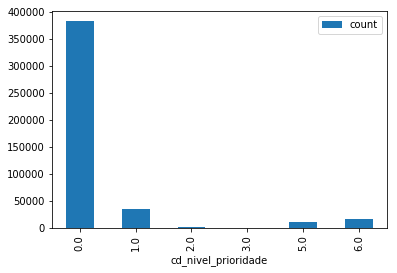

In [7]:
od_tot.plot.bar()
plt.show()

In [8]:
od_tot_transp = od_tot.transpose()

In [9]:
od_tot_transp['com_od'] = od_tot_transp['1.0'] + od_tot_transp['2.0']
od_tot_transp['tot'] = od_tot_transp['0.0'] + od_tot_transp['1.0'] + od_tot_transp['2.0'] + od_tot_transp['3.0'] + od_tot_transp['5.0'] + od_tot_transp['6.0']
od_tot_transp['sem_od'] = od_tot_transp['tot'] - od_tot_transp['com_od']
od_tot_transp['otr_prior'] = od_tot_transp['3.0'] + od_tot_transp['5.0'] + od_tot_transp['6.0']
od_tot_transp['com_od_pct'] = od_tot_transp['com_od'] / od_tot_transp['tot']

In [10]:
od_tot_transp

cd_nivel_prioridade,0.0,1.0,2.0,3.0,5.0,6.0,com_od,tot,sem_od,otr_prior,com_od_pct
count,382766,34305,1189,490,10462,16033,35494,445245,409751,26985,0.079718


In [14]:
od_tot_transp_csv = od_tot_transp[['com_od', 'sem_od']]
od_tot_transp_csv.to_csv('exports/od_tot.csv', header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'exports/od_tot.csv'

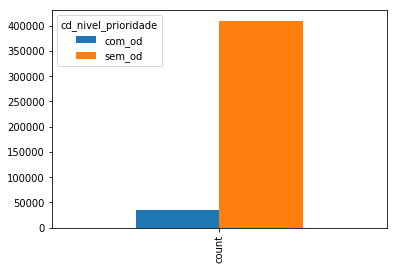

In [15]:
od_tot_transp_csv.plot.bar()
plt.show()

## Tabela pivô por Distrito

In [16]:
od_pivot = (pd.pivot_table(od_df, values='count', index=['nm_distrito'],
                     columns=['cd_nivel_prioridade'], aggfunc=np.sum))

In [17]:
od_pivot = od_pivot.fillna(value=0)
od_pivot

cd_nivel_prioridade,0.0,1.0,2.0,3.0,5.0,6.0
nm_distrito,,,,,,
AGUA RASA,1591.0,58.0,1.0,2.0,15.0,61.0
ALTO DE PINHEIROS,536.0,10.0,0.0,0.0,2.0,23.0
ANHANGUERA,3185.0,214.0,0.0,5.0,54.0,152.0
ARICANDUVA,1981.0,269.0,0.0,0.0,56.0,75.0
ARTUR ALVIM,3854.0,243.0,13.0,3.0,44.0,164.0
BARRA FUNDA,503.0,16.0,0.0,1.0,1.0,8.0
BELA VISTA,2029.0,216.0,1.0,1.0,20.0,69.0
BELEM,1997.0,40.0,3.0,0.0,20.0,74.0
BOM RETIRO,1914.0,80.0,4.0,2.0,33.0,50.0


In [18]:
od_pivot['com_od'] = od_pivot['1.0'] + od_pivot['2.0']
od_pivot['tot'] = od_pivot['0.0'] + od_pivot['1.0'] + od_pivot['2.0'] + od_pivot['3.0'] + od_pivot['5.0'] + od_pivot['6.0']
od_pivot['sem_od'] = od_pivot['tot'] - od_pivot['com_od']
od_pivot['otr_prior'] = od_pivot['3.0'] + od_pivot['5.0'] + od_pivot['6.0']
od_pivot['com_od_pct'] = od_pivot['com_od'] / od_pivot['tot']
od_pivot['sem_od_pct'] = 1 - od_pivot['com_od_pct']

In [19]:
od_pivot

cd_nivel_prioridade,0.0,1.0,2.0,3.0,5.0,6.0,com_od,tot,sem_od,otr_prior,com_od_pct,sem_od_pct
nm_distrito,,,,,,,,,,,,
AGUA RASA,1591.0,58.0,1.0,2.0,15.0,61.0,59.0,1728.0,1669.0,78.0,0.034144,0.965856
ALTO DE PINHEIROS,536.0,10.0,0.0,0.0,2.0,23.0,10.0,571.0,561.0,25.0,0.017513,0.982487
ANHANGUERA,3185.0,214.0,0.0,5.0,54.0,152.0,214.0,3610.0,3396.0,211.0,0.059280,0.940720
ARICANDUVA,1981.0,269.0,0.0,0.0,56.0,75.0,269.0,2381.0,2112.0,131.0,0.112978,0.887022
ARTUR ALVIM,3854.0,243.0,13.0,3.0,44.0,164.0,256.0,4321.0,4065.0,211.0,0.059246,0.940754
BARRA FUNDA,503.0,16.0,0.0,1.0,1.0,8.0,16.0,529.0,513.0,10.0,0.030246,0.969754
BELA VISTA,2029.0,216.0,1.0,1.0,20.0,69.0,217.0,2336.0,2119.0,90.0,0.092894,0.907106
BELEM,1997.0,40.0,3.0,0.0,20.0,74.0,43.0,2134.0,2091.0,94.0,0.020150,0.979850
BOM RETIRO,1914.0,80.0,4.0,2.0,33.0,50.0,84.0,2083.0,1999.0,85.0,0.040326,0.959674


## Gerando JSON para mapas

In [20]:
sp_distritos = geojson.loads(open('dados/geosampa/distritos/sp_distritos.geojson').read())
print(f"{len(sp_distritos['features'])} distritos carregados")

FileNotFoundError: [Errno 2] No such file or directory: 'dados/geosampa/distritos/sp_distritos.geojson'

In [21]:
for i in sp_distritos['features']:
    distrito = i['properties']['ds_nome']
    i['properties']['com_od_pct'] = float(str(round(((od_pivot.loc[distrito]['com_od_pct']) * 100), 1)))
    i['properties']['sem_od_pct'] = float(str(round(((od_pivot.loc[distrito]['sem_od_pct']) * 100), 1)))
    i['properties']['com_od'] = od_pivot.loc[distrito]['com_od']
    i['properties']['tot'] = od_pivot.loc[distrito]['tot']
    i['properties']['sem_od'] = od_pivot.loc[distrito]['sem_od']
    i['properties']['otr_prior'] = od_pivot.loc[distrito]['otr_prior']

NameError: name 'sp_distritos' is not defined

In [149]:
sp_distritos['features'][0]['properties']

{'area_m2': 13369947,
 'com_od': 288.0,
 'com_od_pct': 9.8,
 'ds_codigo': '51',
 'ds_nome': 'MANDAQUI',
 'otr_prior': 180.0,
 'sem_od': 2643.0,
 'sem_od_pct': 90.2,
 'tot': 2931.0}

In [154]:
if not os.path.exists('mapas/ordem-judicial'):
    os.makedirs('mapas/ordem-judicial')
with open('mapas/ordem-judicial/sp_distritos.geojson', "w") as text_file:
    print(geojson.dumps(sp_distritos), file=text_file)